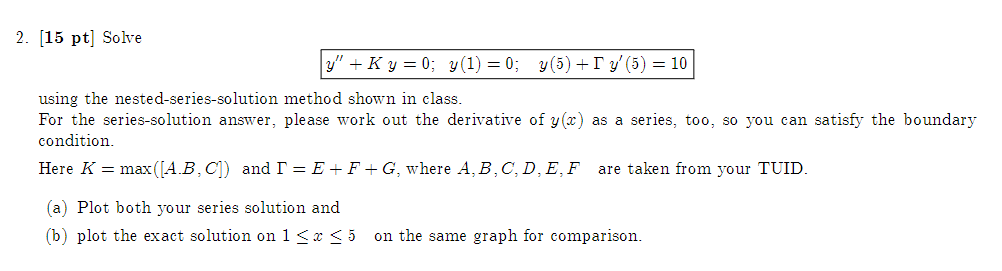

In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
TUID = [9, 1, 5, 1, 8, 7, 2, 8, 9]
LETTER_MAP = ['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
total_sum = 0

for i in range(len(TUID)):
    total_sum += TUID[i]

average = total_sum / len(TUID)

print(f'my TUID average: {average}')

# Create a dictionary to map letters to integers
letter_to_int_map = {letter: integer for letter, integer in zip(LETTER_MAP, TUID)}

# Now, calculate the average of the letters of interest
K_letters = ["A", "B", "C"]
iota_letters = ["E", "F", "G"]

K = np.max([letter_to_int_map[letter] for letter in K_letters])
print(K)

iota = np.sum([letter_to_int_map[letter] for letter in iota_letters])
print(iota)


my TUID average: 5.555555555555555
9
14


### Nested Power Series Solutiuon

In [2]:
# Number of terms for power series
N = 50

# Coefficient generation for power series
a = [0] * (N+1)
a[0] = 1
a[1] = 0

for p in range(N-1):
    a[p+2] = -9*a[p]/((p+2)*(p+1))

# Power series approximation
def y_approx(x):
    return sum([a[p] * (x**p) for p in range(N+1)])


### Exact Solution

In [58]:
# Exact solution
C1 = 1
C2 = 0
def y_exact(x):
    return C1 * np.cos(3*x) + C2 * np.sin(3*x)

# Values for x
x_vals = np.linspace(1, 5, 400)
y_approx_vals = [y_approx(x) for x in x_vals]
y_exact_vals = [y_exact(x) for x in x_vals]

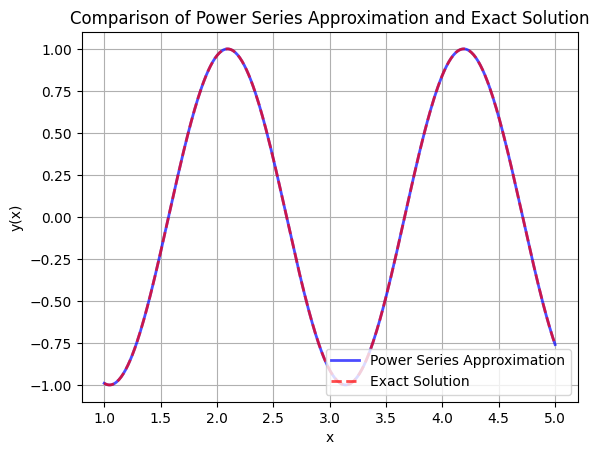

In [59]:
# Plot
plt.plot(x_vals, y_approx_vals, label='Power Series Approximation', linewidth=2, color='blue', alpha=0.7)
plt.plot(x_vals, y_exact_vals, label='Exact Solution', linestyle='dashed', linewidth=2, color='red', alpha=0.7)
plt.title('Comparison of Power Series Approximation and Exact Solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

----
need to use the log method shown in class and make sure to solve for the boundary conditions

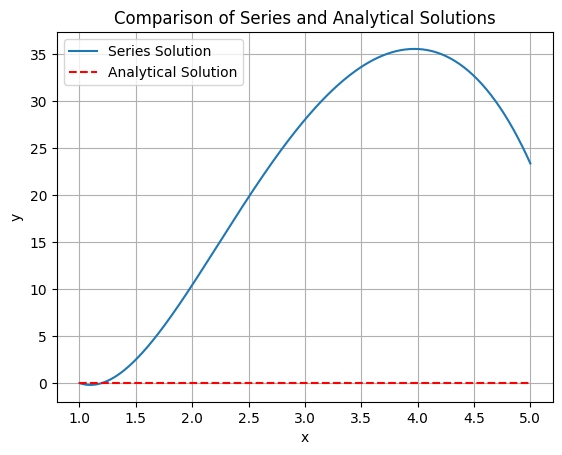

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Coefficients for the power series
c = {0: 1, 1: 1}

# Recurrence relation
def next_c(k, c):
    return -9 / (k * (k - 1)) * c[k - 2]

# Generate coefficients up to the threshold
threshold = 1e-3
k = 2
while True:
    c[k] = next_c(k, c)
    if abs(c[k] * 1**k) < threshold and k > 2:
        break
    k += 2

# Calculate E and O
def calculate_E_O(E_or_O, x, k, c):
    return sum(c.get(2*i if E_or_O == 'E' else 2*i + 1, 0) * x**i for i in range(k//2 + 1))

# Calculate E' and O'
def calculate_E_O_prime(E_or_O, x, k, c):
    return sum(i * c.get(2*i if E_or_O == 'E' else 2*i + 1, 0) * x**(i - (1 if E_or_O == 'E' else 0)) for i in range(1, k//2 + 1))

# Boundary conditions
E_at_1 = calculate_E_O('E', 1, k, c)
O_at_1 = calculate_E_O('O', 1, k, c)
E_at_5 = calculate_E_O('E', 5, k, c)
O_at_5 = calculate_E_O('O', 5, k, c)
E_prime_at_5 = calculate_E_O_prime('E', 5, k, c)
O_prime_at_5 = calculate_E_O_prime('O', 5, k, c)

C_A = -O_at_1 / E_at_1  # Assuming C_B = 1 initially
C_B = -(E_at_5 + 14 * E_prime_at_5) * C_A / (O_at_5 + 14 * O_prime_at_5)
C_A = -C_B * O_at_1 / E_at_1  # Recalculate C_A with the new C_B value

# Series solution function
def series_solution(x, C_A, C_B, k, c):
    return C_A * calculate_E_O('E', x, k, c) + C_B * calculate_E_O('O', x, k, c)

# Analytical solution functions
def equations(p):
    A, B = p
    eq1 = A * np.cos(3) + B * np.sin(3)  # y(1) = 0
    eq2 = A * np.cos(15) + B * np.sin(15) + 14 * (-3 * A * np.sin(15) + 3 * B * np.cos(15))  # y(5) + 14y'(5) = 0
    return (eq1, eq2)

# Solve for A and B
A, B = fsolve(equations, (1, 1))

def analytical_solution(x):
    return A * np.cos(3 * x) + B * np.sin(3 * x)

# Create an array of x values from 1 to 5
x_values = np.linspace(1, 5, 400)

# Calculate the series and analytical solutions for each x value
y_values_series = np.array([series_solution(x, C_A, C_B, k, c) for x in x_values])
y_values_analytical = np.array([analytical_solution(x) for x in x_values])

# Plotting both solutions
plt.plot(x_values, y_values_series, label='Series Solution')
plt.plot(x_values, y_values_analytical, linestyle='--', label='Analytical Solution', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Series and Analytical Solutions')
plt.legend()
plt.grid(True)
plt.show()


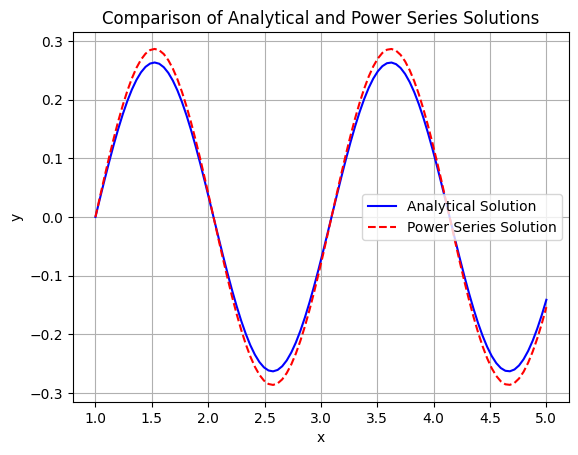

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, cos, sin, diff, solve, Eq, lambdify

# Define symbolic variables
x = symbols('x')
A, B, c0, c1 = symbols('A B c0 c1')

# Analytical solution
y_analytical = A * cos(3*x) + B * sin(3*x)

# Given boundary conditions
boundary_conditions = {
    'y_at_1': y_analytical.subs(x, 1),  # y(1) = 0
    'y_prime_at_5': diff(y_analytical, x).subs(x, 5),  # y'(5) evaluated
}

# Solve for A and B using the boundary conditions
constants = solve([Eq(boundary_conditions['y_at_1'], 0), Eq(boundary_conditions['y_prime_at_5'] + 14 * boundary_conditions['y_prime_at_5'], 10)], (A, B))

# Substitute A and B back into the analytical solution
y_analytical = y_analytical.subs(constants)

# Function to compute coefficients
def compute_coefficients(n_terms):
    coeffs = [0] * n_terms
    coeffs[0], coeffs[1] = c0, c1  # Keep the first two coefficients symbolic
    for k in range(2, n_terms):
        coeffs[k] = -9 * coeffs[k-2] / (k * (k-1))
    return coeffs

# Number of terms in the power series
n_terms = 100

# Compute the coefficients
coeffs = compute_coefficients(n_terms)

# Construct the power series solution
y_power_series = sum(coeffs[k] * x**k for k in range(n_terms))

# Apply the boundary conditions to find c0 and c1
# Boundary condition at x=1: y(1) = 0
# Boundary condition at x=5: y(5) + 14y'(5) = 10
bc1 = y_power_series.subs(x, 1)
bc2 = y_power_series.subs(x, 5) + 14 * diff(y_power_series, x).subs(x, 5) - 10
solutions = solve((bc1, bc2), (c0, c1))

# Substitute the solutions back into the power series
y_power_series = y_power_series.subs(solutions)

# Lambdify the expressions for numerical evaluation
y_analytical_func = lambdify(x, y_analytical)
y_power_series_func = lambdify(x, y_power_series)

# Generate data for plotting
x_vals = np.linspace(1, 5, 100)
y_analytical_vals = y_analytical_func(x_vals)
y_power_series_vals = y_power_series_func(x_vals)

# Plot the results
plt.plot(x_vals, y_analytical_vals, label='Analytical Solution', color='blue')
plt.plot(x_vals, y_power_series_vals, label='Power Series Solution', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Analytical and Power Series Solutions')
plt.legend()
plt.grid(True)
plt.show()
